In [1]:
import torch
from torch import nn, optim
import mltools

In [2]:
train_iter, val_iter, test_iter = mltools.mnist('../data', batch_size=1000)  # 获取训练集、验证集和测试集
# 设置模型结构
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256), nn.ReLU(),
    nn.Linear(256, 10))
device = torch.device('cuda')  # 设置设备


class MLP(mltools.CNNLearning):
    def show_pred(self, contents, preds, reals):
        labels = [f'real:{reals[index]}\npred:{preds[index]}' for index in range(len(reals))]
        mltools.images(contents.squeeze(1), labels, shape=(2, 5))


ml = MLP(model, train_iter, val_iter, test_iter, device=device)

2025-05-22 20:28:00,621 - INFO: train loss 0.243, val loss 0.242, val acc 0.930, 4.2 sec/epoch on cuda


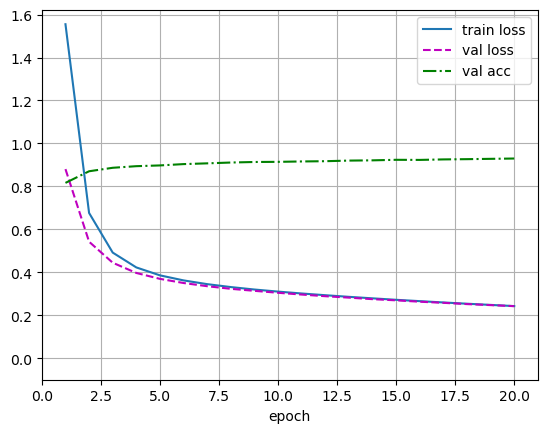

In [3]:
ml.set_loss(nn.CrossEntropyLoss())
ml.set_optimizer(optim.SGD(model.parameters(), lr=1e-1))
ml.train(num_epochs=20)  # 训练

In [4]:
ml.test()  # 测试

2025-05-22 20:28:01,450 - INFO: test acc 0.933


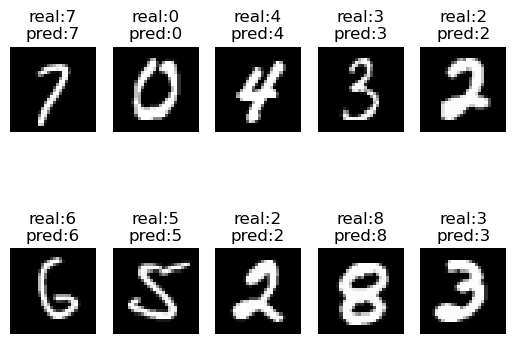

In [5]:
ml.predict()  # 预测